# Task 2: Unsupervised Learning

# Problem Statement:
    
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet,cut_tree,fcluster
from sklearn.neighbors import NearestNeighbors

In [3]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.Id.nunique()

150

In [10]:
df.drop("Id",axis=1,inplace=True)

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.describe(include="object")

,Species
count,150
unique,3
top,Iris-virginica
freq,50


# Missing Values

In [13]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64


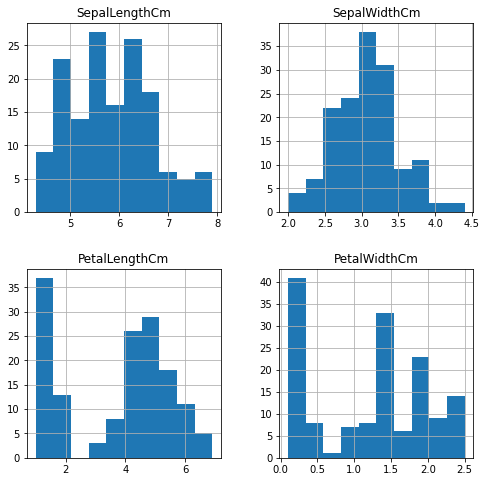

In [15]:
print(df.skew())
plt.rcParams["figure.figsize"]=[8,8]
df.hist()
plt.show()

# Distribution Check

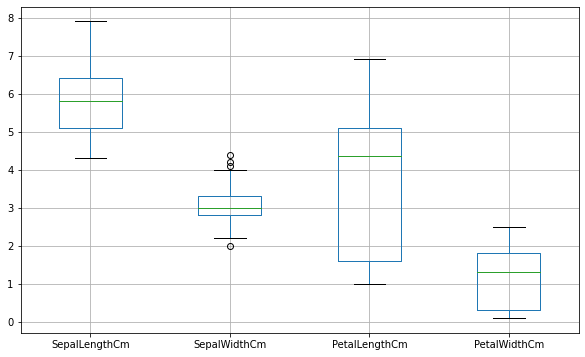

In [16]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.show()

In [17]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [44]:
df.groupby(["Species"]).mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [18]:
X=df.drop("Species",axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# KMEANS Clustering

In [19]:
# Finding the optimal K value
# 1. WCSS
# 2. Silhouette Score

In [31]:
# 1. WCSS

wcss=list();score=list()
for i in range(2,25):
    kmeans=KMeans(n_clusters=i,random_state=4)
    kmeans.fit(X)
    pred=kmeans.labels_
    wcss.append(kmeans.inertia_)
    score.append(silhouette_score(X,pred,random_state=4))

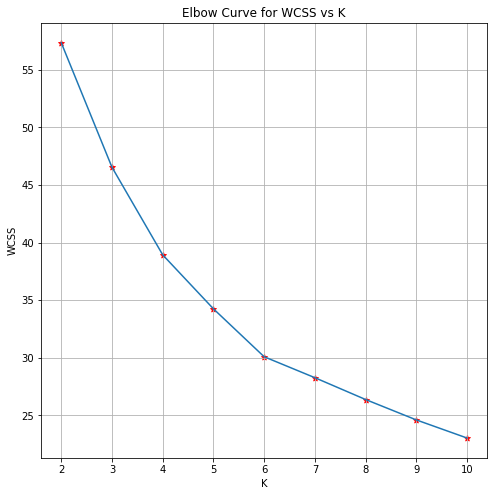

In [32]:
plt.plot(range(2,11),wcss[2:11])
plt.scatter(range(2,11),wcss[2:11],marker="*",c="red")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Curve for WCSS vs K")
plt.grid(True)

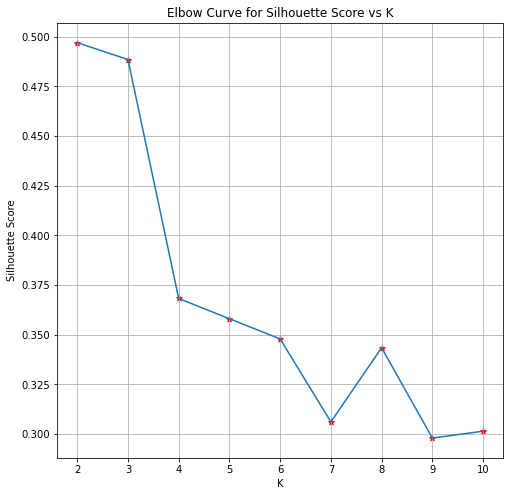

In [33]:
# 2. Silhouette Score

plt.plot(range(2,11),score[2:11])
plt.scatter(range(2,11),score[2:11],marker="*",c="red")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Elbow Curve for Silhouette Score vs K")
plt.grid(True)

In [ ]:
# K=3 as the sudden shift in elbow happens at 3 in both the plots.

In [34]:
kmeans=KMeans(n_clusters=3,random_state=4)
kmeans.fit(X)
pred=kmeans.labels_
pred=pd.Series(pred.reshape(-1,))
pred.value_counts()

1    62
2    50
0    38
dtype: int64

In [38]:
df_kmeans=X.copy()

In [39]:
df_kmeans["Cluster"]=pred

In [40]:
df_kmeans.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [41]:
df_kmeans.Cluster.value_counts()

1    62
2    50
0    38
Name: Cluster, dtype: int64

# Profiling

In [43]:
# Feature mean measures from the clustered dataset

df_kmeans.groupby(["Cluster"]).mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Cluster,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.901613,2.748387,4.393548,1.433871
2,5.006000,3.418000,1.464000,0.244000


In [45]:
# Feature mean measures from the original dataset

df.groupby(["Species"]).mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
# Cluster 0 resembles to Iris-virginica in its mean measures.
# Cluster 1 resembles to Iris-versicolor in its mean measures.
# Cluster 2 resembles to Iris-setosa in its mean measures.

# Cluster Visualization

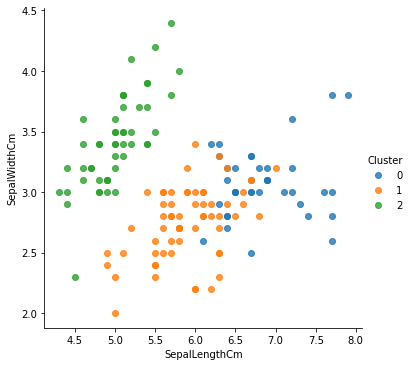

In [50]:
sns.lmplot(x="SepalLengthCm",y="SepalWidthCm",data=df_kmeans,hue="Cluster",fit_reg=False)
plt.show()

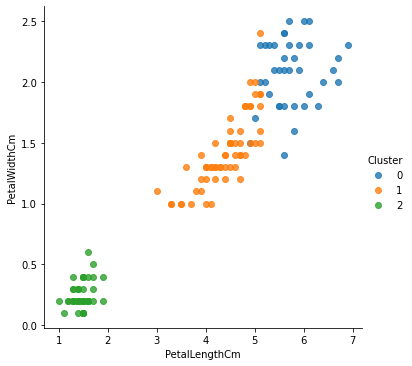

In [51]:
sns.lmplot(x="PetalLengthCm",y="PetalWidthCm",data=df_kmeans,hue="Cluster",fit_reg=False)
plt.show()

In [ ]:
# The cluster scattering is considerably good wihout too much of inertia.